# Classification

- Tree
- Logistic
- Tuning
- Bayes
- SVM

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import pymc3 as pm
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import graphviz
from IPython.display import Image  
import pydotplus

In [3]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
df = pd.DataFrame(X, columns=cancer.feature_names)

In [4]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [5]:
df['target'] = y
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [7]:
df.columns = [col.replace(' ', '_') for col in df.columns]

In [8]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
### Logistic

In [11]:
lgr = LogisticRegression()

In [12]:
lgr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
lgr.score(X_test, y_test)

0.9440559440559441

In [14]:
from sklearn.dummy import DummyClassifier

In [15]:
dummy = DummyClassifier(strategy='most_frequent')

In [16]:
dummy.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [17]:
dummy.score(X_test, y_test)

0.5594405594405595

In [18]:
features = cancer.feature_names
coefs = lgr.coef_[0]

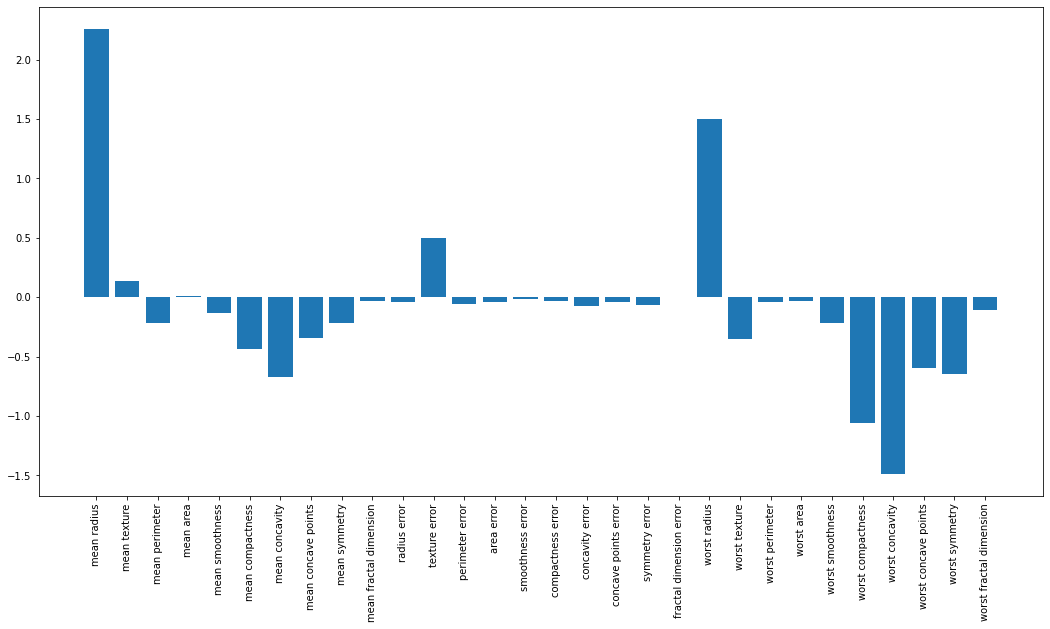

In [19]:
plt.figure(figsize = (18, 9))
plt.bar(features, coefs)
plt.xticks(rotation = 90);

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sscaler = StandardScaler()
X_train_scaled = sscaler.fit_transform(X_train)
X_test_scaled = sscaler.transform(X_test)

In [30]:
params = {'C': [0.1, 1, 10, 100, 1000, 10000],
         'penalty': ['l1', 'l2']}

In [31]:
grid = GridSearchCV(lgr, param_grid=params)

In [32]:
grid.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [33]:
grid.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
grid.score(X_test, y_test)

0.951048951048951

In [35]:
coefs = grid.best_estimator_.coef_

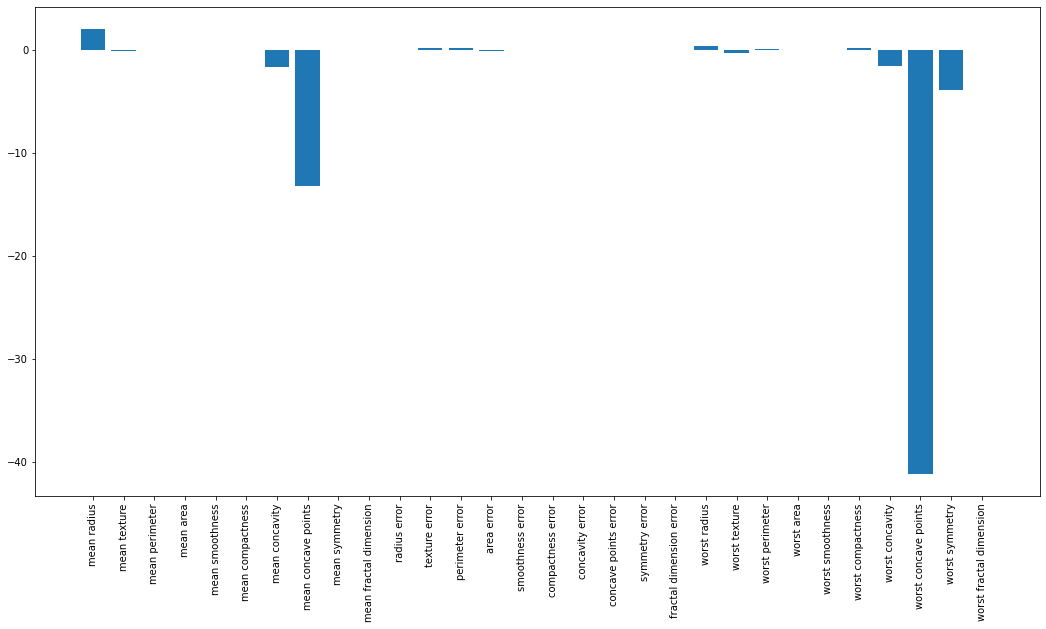

In [36]:
plt.figure(figsize = (18, 9))
plt.bar(features, coefs[0])
plt.xticks(rotation = 90);

In [37]:
from sklearn.metrics import classification_report

In [38]:
preds = grid.predict(X_test)

In [39]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        63
           1       0.97      0.94      0.96        80

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [40]:
probs = grid.best_estimator_.predict_proba(X_test)

In [43]:
new_predictions = np.where(probs[:, 1] > 0.2, 1, 0)

In [44]:
print(classification_report(y_test, new_predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.95      0.96      0.96        80

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [45]:
from sklearn.datasets import load_digits

In [46]:
digits = load_digits()

In [47]:
X = digits.data

In [48]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

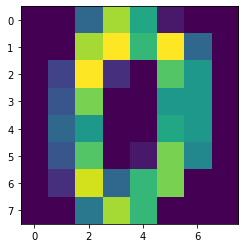

In [49]:
plt.imshow(X[0].reshape(8, 8))

In [50]:
digits.target[0]

0

In [51]:
lgr.fit(digits.data, digits.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
lgr.score(digits.data, digits.target)

0.993322203672788

In [91]:
### Tree

In [53]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

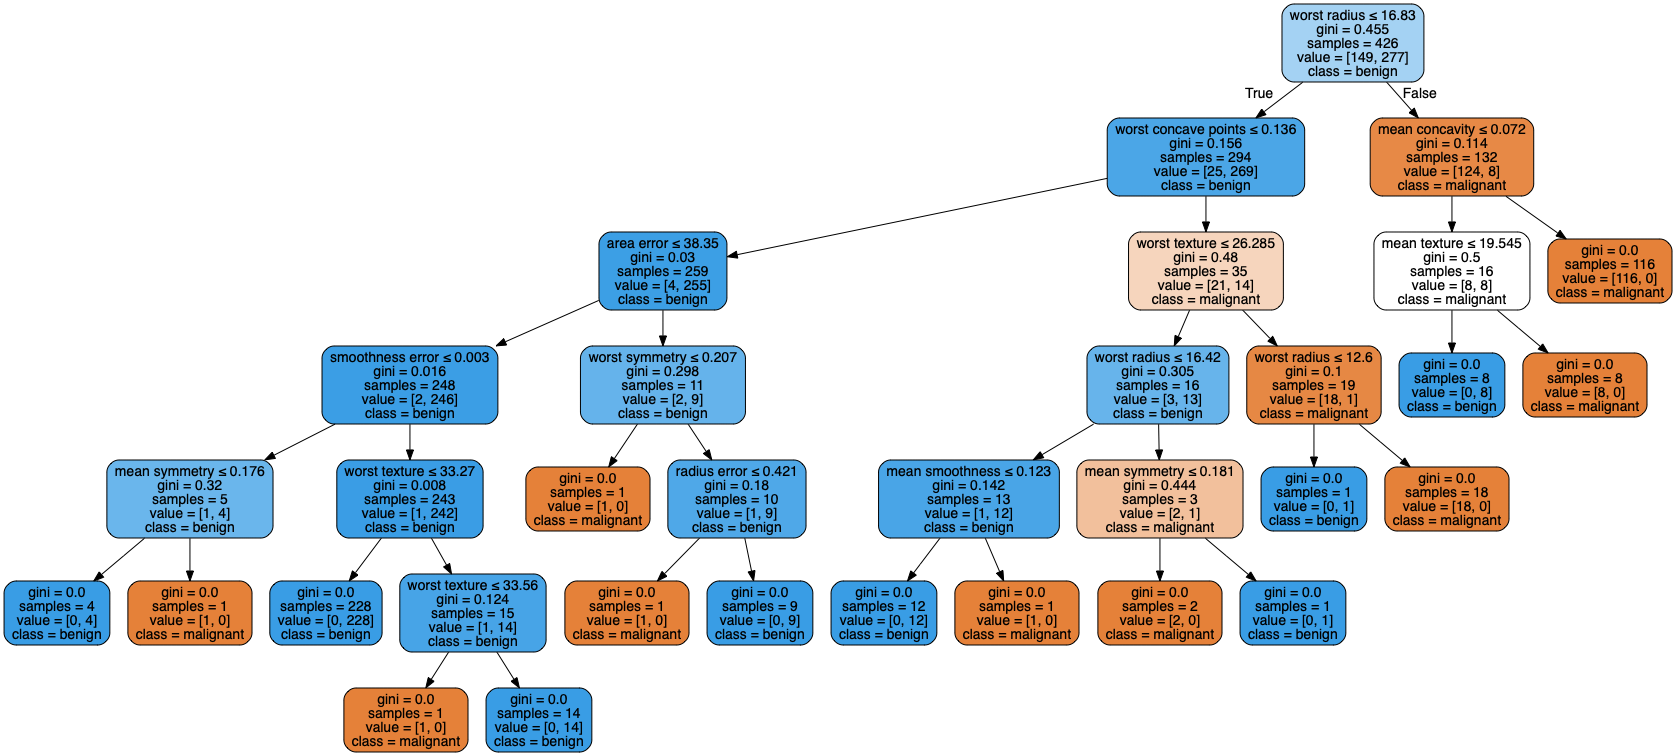

In [54]:
dot_data = export_graphviz(dtree, out_file=None, 
                     feature_names=cancer.feature_names,  
                     class_names=cancer.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [55]:
dtree.score(X_test, y_test)

0.958041958041958

In [56]:
dtree.score(X_train, y_train)

1.0

In [57]:
params = {'criterion': ['gini', 'entropy'], 
         'max_depth': [2, 3, 4, 5],
         'min_samples_leaf' : [1, 2, 4],
         'min_samples_split': [2, 3, 4]}
tree_grid = GridSearchCV(dtree, param_grid=params, cv = 5)

In [58]:
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         

In [59]:
tree_grid.score(X_test, y_test)

0.958041958041958

In [60]:
tree_grid.best_estimator_.feature_importances_

array([0.        , 0.04319685, 0.        , 0.        , 0.        ,
       0.        , 0.03796087, 0.01023083, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00343403, 0.0020301 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.7181009 , 0.05415947, 0.        , 0.0091551 , 0.        ,
       0.        , 0.00795215, 0.1137797 , 0.        , 0.        ])

In [61]:
tree_df = pd.DataFrame({'feature': features, 'importances': tree_grid.best_estimator_.feature_importances_})

In [64]:
tree_df.nlargest(10, 'importances')

,feature,importances
20,worst radius,0.718101
27,worst concave points,0.113780
21,worst texture,0.054159
1,mean texture,0.043197
6,mean concavity,0.037961
7,mean concave points,0.010231
23,worst area,0.009155
26,worst concavity,0.007952
13,area error,0.003434
14,smoothness error,0.002030


In [65]:
tree_df.sort_values(by = 'importances', ascending = False)

,feature,importances
20,worst radius,0.718101
27,worst concave points,0.113780
21,worst texture,0.054159
1,mean texture,0.043197
6,mean concavity,0.037961
7,mean concave points,0.010231
23,worst area,0.009155
26,worst concavity,0.007952
13,area error,0.003434
14,smoothness error,0.002030


### Logistic but with Bayes

In [171]:
tree_df.sort_values(by = 'importances', ascending = False).head()['feature'].values

array(['worst concave points', 'worst area', 'mean smoothness',
       'area error', 'worst concavity'], dtype=object)

In [174]:
df.columns = [col.replace(' ', '_') for col in df.columns]

In [177]:
df.head()
df['target'] = cancer.target

In [178]:
with pm.Model() as logistic_model:
    pm.glm.GLM.from_formula('target ~ worst_concave_points + worst_area',
                            df,
                            family=pm.glm.families.Binomial())
    trace = pm.sample(1000, tune=1000, init='adapt_diag')

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [worst_area, worst_concave_points, Intercept]
Sampling 4 chains, 0 divergences: 100%|██████████| 8000/8000 [00:06<00:00, 1153.66draws/s]


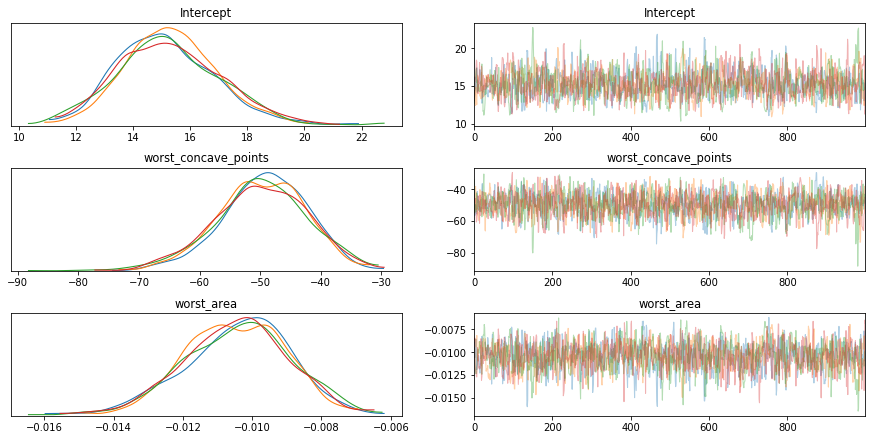

In [179]:
pm.traceplot(trace);

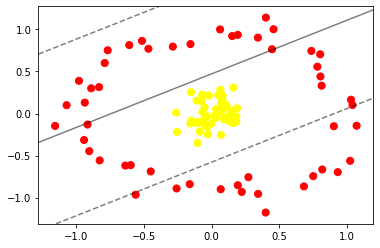

In [180]:
#from jvdp handbook
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
from sklearn.datasets.samples_generator import make_circles
from sklearn.svm import SVC
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [38]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

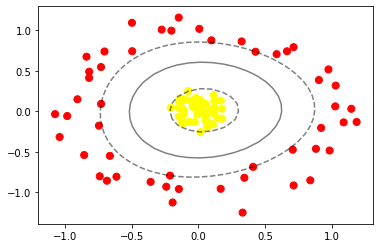

In [39]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

In [181]:
from sklearn.preprocessing import PolynomialFeatures

In [185]:
X = np.array([[1],
             [2],
             [3]])

In [188]:
pfeats = PolynomialFeatures(degree=3)

In [189]:
pfeats.fit_transform(X)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [192]:
X_train_poly = pfeats.fit_transform(X_train)
X_test_p = pfeats.transform(X_test)

In [191]:
lgr.fit(X_train_poly, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [193]:
lgr.score(X_test_p, y_test)

0.9790209790209791

In [194]:
X_train[:2, :]

array([[1.091e+01, 1.235e+01, 6.914e+01, 3.637e+02, 8.518e-02, 4.721e-02,
        1.236e-02, 1.369e-02, 1.449e-01, 6.031e-02, 1.753e-01, 1.027e+00,
        1.267e+00, 1.109e+01, 3.478e-03, 1.221e-02, 1.072e-02, 9.393e-03,
        2.941e-02, 3.428e-03, 1.137e+01, 1.482e+01, 7.242e+01, 3.922e+02,
        9.312e-02, 7.506e-02, 2.884e-02, 3.194e-02, 2.143e-01, 6.643e-02],
       [2.742e+01, 2.627e+01, 1.869e+02, 2.501e+03, 1.084e-01, 1.988e-01,
        3.635e-01, 1.689e-01, 2.061e-01, 5.623e-02, 2.547e+00, 1.306e+00,
        1.865e+01, 5.422e+02, 7.650e-03, 5.374e-02, 8.055e-02, 2.598e-02,
        1.697e-02, 4.558e-03, 3.604e+01, 3.137e+01, 2.512e+02, 4.254e+03,
        1.357e-01, 4.256e-01, 6.833e-01, 2.625e-01, 2.641e-01, 7.427e-02]])

In [195]:
X_train.shape

(426, 30)

In [196]:
X_train_poly.shape

(426, 5456)